In [1]:
import pandas as pd
data = pd.read_csv('data_limp.csv')
data.head()

,Unnamed: 0,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
from sklearn.model_selection import train_test_split

X, y = data[data.columns[2:-1]].values, data[data.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

print ('Set de entrenamiento: %d, filas\nSet de Test: %d filas' % (X_train.shape[0], X_test.shape[0]))

Set de entrenamiento: 243, filas
Set de Test: 162 filas


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
np.set_printoptions(suppress=True)
print('Etiquetas Predichas: ', np.round(predictions)[:10])
print('Etiquetas Actuales   : ' ,y_test[:10])

Etiquetas Predichas:  [34. 36. 13. 48. 41. 33. 45. 48. 43. 45.]
Etiquetas Actuales   :  [40.8 42.3 24.7 55.1 34.1 29.8 51.4 50.4 51.7 26.5]


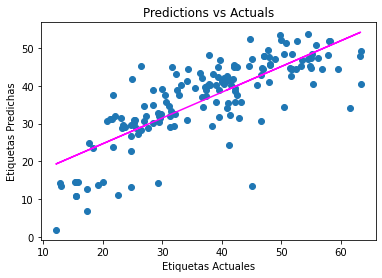

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predictions vs Actuals')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 61.171444085270096
RMSE: 7.821217557725274
R2: 0.5995285127640549


Lasso() 

MSE: 67.00549176318519
RMSE: 8.18568822782698
R2: 0.5613347152312833


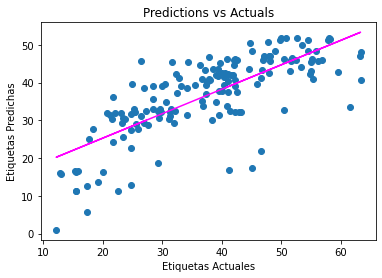

In [6]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train, y_train)
print (model3, "\n")

predictions = model3.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predictions vs Actuals')


z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


model4 = DecisionTreeRegressor()
model4.fit(X_train, y_train)
print (model4, "\n")

tree = export_text(model4)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 988.32
|   |--- feature_0 <= 9.95
|   |   |--- feature_1 <= 97.63
|   |   |   |--- feature_0 <= 3.65
|   |   |   |   |--- feature_0 <= 2.45
|   |   |   |   |   |--- value: [49.70]
|   |   |   |   |--- feature_0 >  2.45
|   |   |   |   |   |--- value: [54.40]
|   |   |   |--- feature_0 >  3.65
|   |   |   |   |--- feature_0 <= 6.35
|   |   |   |   |   |--- feature_2 <= 7.50
|   |   |   |   |   |   |--- value: [62.10]
|   |   |   |   |   |--- feature_2 >  7.50
|   |   |   |   |   |   |--- feature_0 <= 6.10
|   |   |   |   |   |   |   |--- feature_0 <= 4.80
|   |   |   |   |   |   |   |   |--- value: [56.80]
|   |   |   |   |   |   |   |--- feature_0 >  4.80
|   |   |   |   |   |   |   |   |--- feature_0 <= 5.80
|   |   |   |   |   |   |   |   |   |--- value: [53.50]
|   |   |   |   |   |   |   |   |--- feature_0 >  5.80
|   |   |   |   |   |   |   |   |   |--- value: [56.30]
|   |   |   |   |   |   |--- feature_0 >  6.10
|   |   |   |   |   |  

MSE: 53.47511145404663
RMSE: 7.312667875272788
R2: 0.6499141432028623


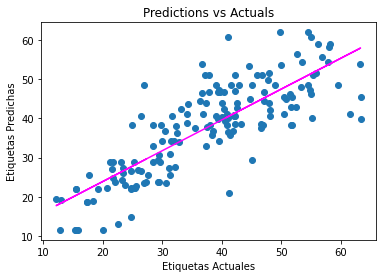

In [8]:
predictions = model4.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predictions vs Actuals')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 39.17076219744069
RMSE: 6.258654983096663
R2: 0.743560518670967


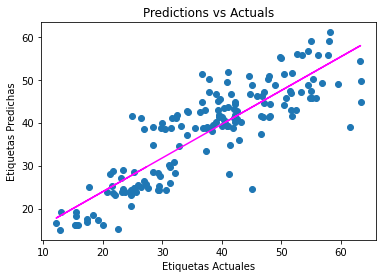

In [9]:
from sklearn.ensemble import RandomForestRegressor

model5 = RandomForestRegressor()
model5.fit(X_train, y_train)
print (model5, "\n")

predictions = model5.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predictions vs Actuals')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 41.24681271687197
RMSE: 6.422368154884301
R2: 0.7299692253554999


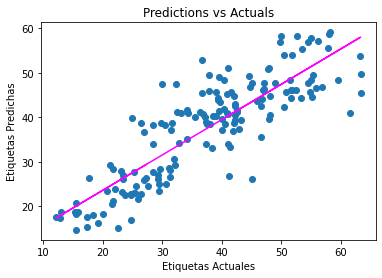

In [10]:

from sklearn.ensemble import GradientBoostingRegressor


model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)
print (model6, "\n")

predictions = model6.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predictions vs Actuals')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

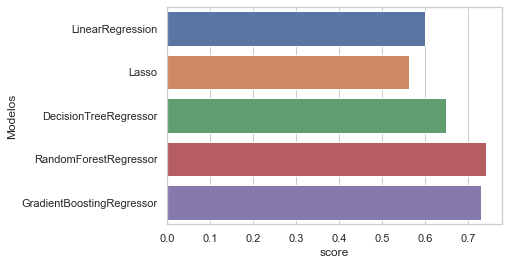

In [11]:
import seaborn as sns
Modelos = ['LinearRegression','Lasso','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
classifiers = [model2, model3, model4, model5, model6]

scores = []
for name, csf in zip(Modelos, classifiers):
    csf.fit(X_train, y_train)
    score = csf.score(X_test, y_test)
    scores.append(score)

df_f = pd.DataFrame()
df_f['Modelos']= Modelos
df_f['score']= scores
df_f

cm_ = sns.light_palette('green', as_cmap=True)
sns.set(style='whitegrid')
ax=sns.barplot(y='Modelos', x='score', data=df_f)

## Se usa el mejor modelo Entretado, que es Random Forest


| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.151|15.3|120.253|6|20.90203|121.5741|
|2013.087|10.6|6457.416|2|20.99155|121.49381|

In [13]:
import joblib

name_ = 'real_state_model.pkl'
joblib.dump(model5, name_)

loaded_model = joblib.load(name_)
New_data = np.array([[15.3,120.253,6,20.90203,121.5741],
                  [10.6,6457.416,2,20.99155,121.49381]])

results = loaded_model.predict(New_data)
print('Predicción de Precio de Vivienda:')
for prediction in results:
    print(round(prediction,2))

Predicción de Precio de Vivienda:
46.32
23.1
